# Model Training
**José Manuel Haces López**
___

The selected dataset analyzes the credit risk of clients, focusing on predicting the likelihood of default. It contains various financial and demographic features, making it suitable for building a supervised classification model. The dataset aims to predict whether a client will default on payments based on historical information.

Key Features:
	•	Income: Annual income of the client.
	•	Credit History: Indicates the client’s past payment performance.
	•	Total Debt: Current accumulated debt amount.
	•	Age: Client’s age in years.
	•	Default Status (Target): Binary label indicating if the client defaulted (1) or not (0).

In [1]:
# Libraries
import os
import sys
import joblib
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Añade la carpeta raíz al PYTHONPATH
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "..")))

## Importing the Dataset from Kaggle

In [2]:
# Downloading the dataset
path = kagglehub.dataset_download('upadorprofzs/credit-risk', path='original.csv')

# Loading the dataset into a DF
df = pd.read_csv(path)
df.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


## EDA

In [3]:
# Checking the datatypes
df.dtypes

clientid      int64
income      float64
age         float64
loan        float64
default       int64
dtype: object

In [4]:
# Getting the unique values from the columns
for i in df.columns:
    print(f"- {i}: {df[i].nunique()} - {df[i].unique()}")

- clientid: 2000 - [   1    2    3 ... 1998 1999 2000]
- income: 2000 - [66155.92509508 34415.15396582 57317.17006303 ... 44311.44926231
 43756.05660491 69436.57955155]
- age: 1997 - [59.01701507 48.1171531  63.10804949 ... 28.0171669  63.97179584
 56.15261703]
- loan: 2000 - [8106.53213129 6564.74501768 8020.95329639 ... 5522.78669326 1622.72259832
 7378.83359873]
- default: 2 - [0 1]


In [5]:
# Describing the columns
df.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [6]:
# Counting NaN values
df.isna().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

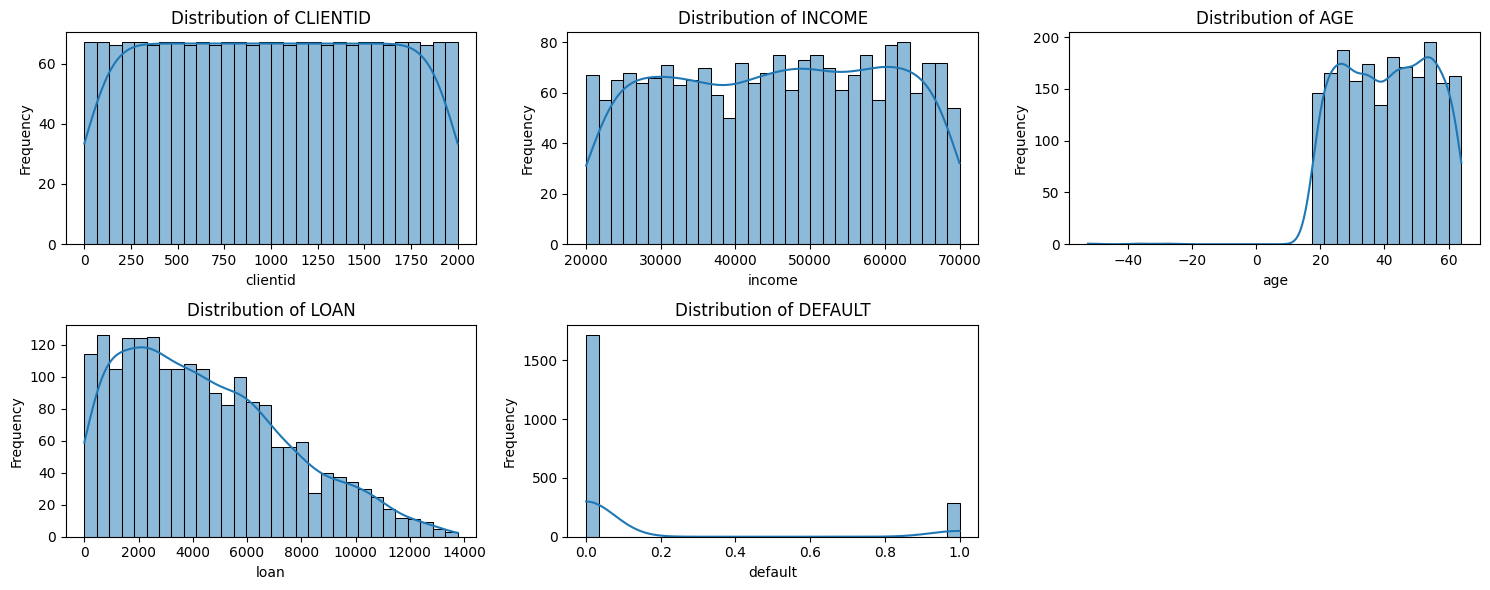

In [7]:
from src.utils.Ploting_Utils import plot_distributions

plot_distributions(df=df)

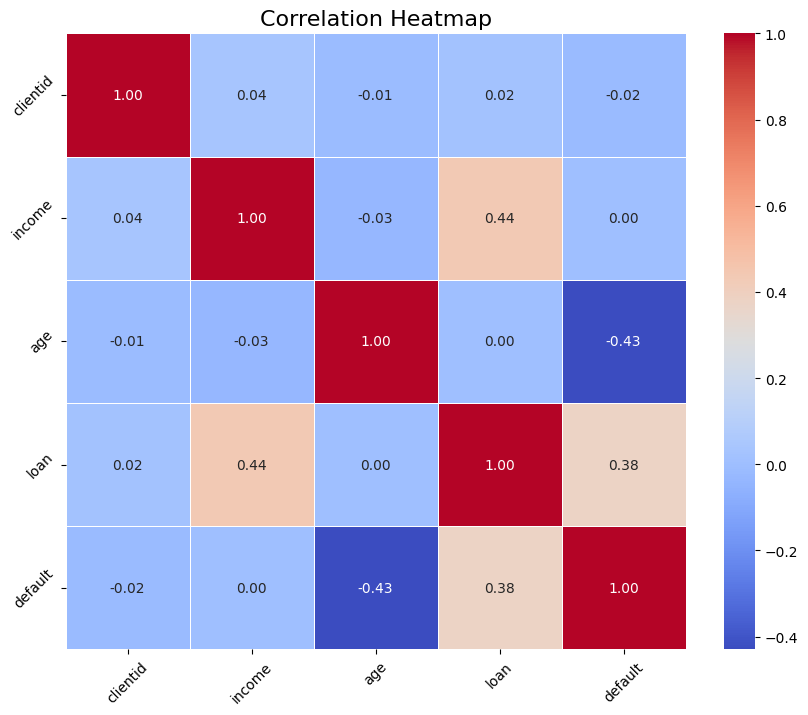

In [8]:
from src.utils.Ploting_Utils import plot_correlation_heatmap

plot_correlation_heatmap(df=df)

## Preprocessing of the dataset

In [9]:
df.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [10]:
for i in df.columns[:-1]:
    print(f"- {i}: {df[i].min()} - {df[i].max()}")

- clientid: 1 - 2000
- income: 20014.4894700497 - 69995.6855783239
- age: -52.4232799196616 - 63.971795841120205
- loan: 1.37762959325451 - 13766.0512393337


In [11]:
# Droping NaN values from age
df = df.dropna()
df.isna().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

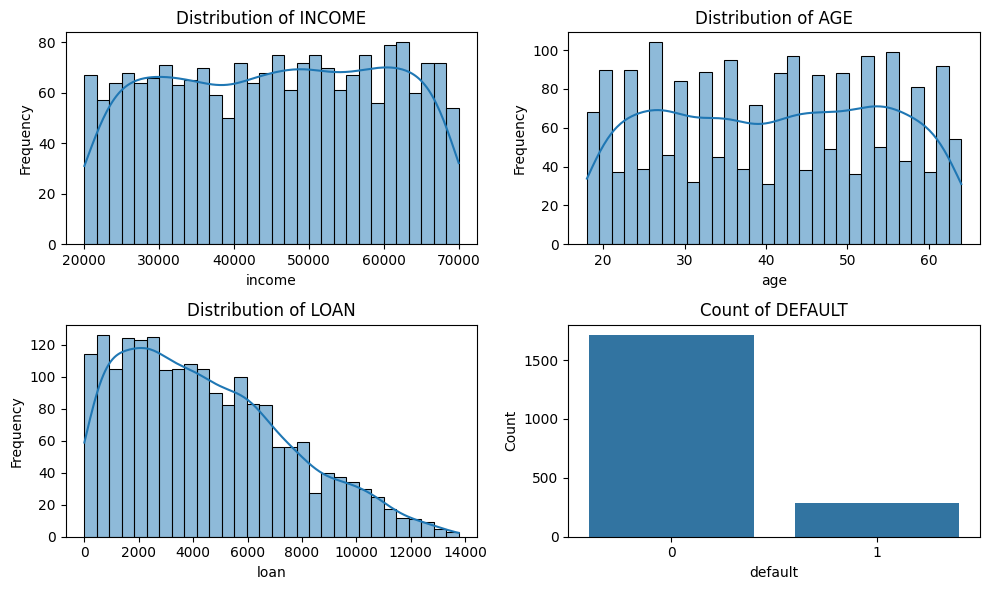

In [12]:
# Droping the ID column
df.drop(['clientid'], inplace=True, axis=1)

df['income'] = df['income'].apply(lambda x: np.round(x, decimals=2))

df['age'] = df['age'].apply(lambda x: int(np.round(x * -1, decimals=0)) if x < 0 else int(np.round(x, decimals=0)))

df['loan'] = df['loan'].apply(lambda x: np.round(x, decimals=2))

df['loan'] = df['loan'].apply(lambda x: np.round(x, decimals=2))

df['default'] = df['default'].apply(lambda x: int(np.round(x, decimals=0)))
df['default'] = df['default'].astype('category')

plot_distributions(df=df,n_cols=2)

## Modeling

### Model1 - Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(df.drop(['age', 'default'], axis=1), df['default'], test_size=0.2)

In [14]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Testing the model
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print('******************')
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.86      0.96      0.90       334
           1       0.44      0.18      0.26        66

    accuracy                           0.83       400
   macro avg       0.65      0.57      0.58       400
weighted avg       0.79      0.83      0.80       400

******************
AUC-ROC: 0.5684540010887317


### Model2 - Logistic Regression v2

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['income', 'default'], axis=1), df['default'], test_size=0.2)

In [17]:
model2 = LogisticRegression()

model2.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Testing the model
y_pred = model2.predict(X_test)
y_proba = model2.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print('******************')
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       331
           1       0.81      0.62      0.70        69

    accuracy                           0.91       400
   macro avg       0.87      0.80      0.83       400
weighted avg       0.91      0.91      0.91       400

******************
AUC-ROC: 0.7964884627172819


### Model3 - XGBoost

In [19]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(df.drop(['default'], axis=1), df['default'], test_size=0.2)

xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [20]:
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_xgb))
print('******************')
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_xgb)}")

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       348
           1       0.96      1.00      0.98        52

    accuracy                           0.99       400
   macro avg       0.98      1.00      0.99       400
weighted avg       1.00      0.99      1.00       400

******************
AUC-ROC: 0.9971264367816092


## Saving the Models

In [21]:
print('Modelo de Regresión Guardado')
joblib.dump(model, './Models/ModelDefault_Logistic:v1.pkl')
print('Modelo de Regresión v2 Guardado')
joblib.dump(model2, './Models/ModelDefault_Logistic:v2.pkl')
print('Modelo XGBoost Guardado')
joblib.dump(xgb_model, './Models/ModelDefault_XGBoost:v1.pkl')

Modelo de Regresión Guardado
Modelo de Regresión v2 Guardado
Modelo XGBoost Guardado


['./Models/ModelDefault_XGBoost:v1.pkl']

In [22]:
max(['v1', 'v2'])

'v2'